# MCBDD Module I, Task 2

$P(i|p) = \frac{P(p|i) \times P(i)}{P(p|i) \times P(i) + P(p|h) \times P(h)}
= \frac{sensitivity \times prevalence}{sensitivity \times prevalence + (1 - specificity) \times (1 - prevalence)}, with:$

$sensitivity = P(p|i)$

$specificity = P(n|h) = 1 - P(p|h)$

In [2]:
def p_infected(prevalence, sensitivity, specificity):
    return sensitivity * prevalence / (sensitivity * prevalence + (1 - specificity) * (1 - prevalence))

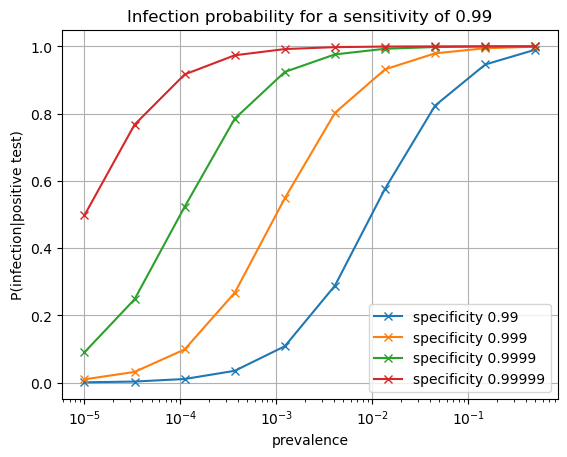

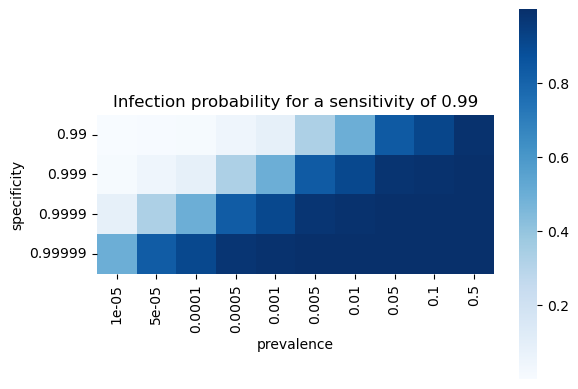

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

prevalence = np.logspace(-5,np.log10(0.5),10)
sensitivity = 0.99
specificity = [0.99,0.999,0.9999,0.99999]

for s in specificity:
    plt.semilogx(prevalence, p_infected(prevalence, sensitivity, s),'x-',label='specificity %s'%s)
plt.xlabel('prevalence')
plt.ylabel('P(infection|positive test)')
plt.title('Infection probability for a sensitivity of 0.99')
plt.grid(True)
plt.legend()
plt.show()

heatmap_prev = np.array([1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1])
heatmap = pd.DataFrame((p_infected(heatmap_prev, sensitivity, s) for s in specificity),index=specificity,columns=heatmap_prev)
sns.heatmap(heatmap,square=True,cmap='Blues').set(xlabel='prevalence',ylabel='specificity',title='Infection probability for a sensitivity of 0.99')
plt.show()

In [52]:
# Assume the population of Basel (200,000) being tested,
# an infection prevalence of 1%, and a sensitivity and specificity of 99%
sens = 0.99
spec = 0.99
pop = 2e5
infected = pop*0.01

print("Of the 2000 infected people:")
print("true positives: {}".format(round(infected*sens)))
print("false negatives: {}\n".format(round(infected*(1-sens))))

print("And of the 198,000 healthy people:")
print("true negatives: {}".format(round((pop-infected)*spec)))
print("false positives: {}".format(round((pop-infected)*(1-spec))))

Of the 2000 infected people:
true positives: 1980
false negatives: 20

And of the 198,000 healthy people:
true negatives: 196020
false positives: 1980


In [53]:
# 3980 test positive, of which 1980 should be true positives
print("true positives according to my code: {}".format(round(3960*p_infected(prevalence=0.01,sensitivity=sens,specificity=spec))))


true positives according to my code: 1980
